In [2]:
#connecting with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#path declaration
path = "/content/drive/MyDrive/Data_Analytics/Airbnb.csv"

In [4]:
#importing necessary libraries with alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#creating dataframe
airbnb_df = pd.read_csv(path)

In [6]:
#removing the null values
airbnb_df = airbnb_df.dropna()

In [27]:
#removing outliers using percentile method from Private Room Dataframe
airbnb_min_price_threshold=airbnb_df.price.quantile(0.01)
airbnb_max_price_threshold=airbnb_df.price.quantile(0.999)
airbnb_min_nights_threshold=airbnb_df.minimum_nights.quantile(0.01)
airbnb_max_nights_threshold=airbnb_df.minimum_nights.quantile(0.999)
ratio=airbnb_df.price/airbnb_df.minimum_nights
min_ratio=ratio.quantile(0.3)
max_ratio=ratio.quantile(0.9)
reviews_min = airbnb_df.number_of_reviews.quantile(0.1)
reviews_max = airbnb_df.number_of_reviews.quantile(0.8)
airbnb_df = airbnb_df[(airbnb_df.price<airbnb_max_price_threshold) & (airbnb_df.price>airbnb_min_price_threshold) & (airbnb_df.minimum_nights<airbnb_max_nights_threshold) & (airbnb_df.minimum_nights>airbnb_min_nights_threshold) & ((airbnb_df.price/airbnb_df.minimum_nights)<max_ratio) & ((airbnb_df.price/airbnb_df.minimum_nights)<min_ratio) & (airbnb_df.number_of_reviews<reviews_max) & (airbnb_df.number_of_reviews>reviews_min)]

In [28]:
#dataframe info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 45 to 48024
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2133 non-null   int64  
 1   name                            2133 non-null   object 
 2   host_id                         2133 non-null   int64  
 3   host_name                       2133 non-null   object 
 4   neighbourhood_group             2133 non-null   object 
 5   neighbourhood                   2133 non-null   object 
 6   latitude                        2133 non-null   float64
 7   longitude                       2133 non-null   float64
 8   room_type                       2133 non-null   object 
 9   price                           2133 non-null   int64  
 10  minimum_nights                  2133 non-null   int64  
 11  number_of_reviews               2133 non-null   int64  
 12  last_review                     

In [29]:
#dataframe descibre
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.133000e+03,2.133000e+03,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.474985e+07,4.951896e+07,40.733759,-73.956264,98.537271,29.042663,7.503985,0.374965,15.246601,183.155649
std,9.664206e+06,6.345567e+07,0.052385,0.036201,48.410215,16.357078,6.016442,0.484462,28.675191,134.225389
min,1.262700e+04,2.868000e+03,40.546390,-74.176280,34.000000,6.000000,2.000000,0.030000,1.000000,0.000000
25%,5.749382e+06,5.288991e+06,40.694160,-73.981320,55.000000,25.000000,3.000000,0.130000,1.000000,35.000000
50%,1.404114e+07,2.106408e+07,40.731320,-73.956970,92.000000,30.000000,5.000000,0.240000,3.000000,203.000000
75%,2.202004e+07,6.139196e+07,40.767200,-73.941270,133.000000,30.000000,10.000000,0.410000,14.000000,316.000000
max,3.603829e+07,2.667261e+08,40.896910,-73.736500,399.000000,175.000000,26.000000,5.100000,327.000000,365.000000


In [30]:
#dataframe
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
45,12627,Entire apartment in central Brooklyn neighborh...,49670,Rana,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,Entire home/apt,150,29,11,2019-06-05,0.49,1,95
59,15341,**Bright Nolita Apt w Doorman/Elevators/Gym**,60049,Ted,Manhattan,SoHo,40.72210,-73.99775,Entire home/apt,180,30,21,2019-06-29,0.30,1,154
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,2019-05-31,0.22,1,324
135,31555,Luminous Beautiful West Village Studio,135619,Tom,Manhattan,West Village,40.73442,-74.00303,Entire home/apt,115,29,26,2019-07-01,0.25,1,12
151,36121,Lg Rm in Historic Prospect Heights,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,2013-05-10,0.09,1,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46255,35166718,PRIME NOMAD: MASSIVE ROOM IN BOHEMIAN ART LOFT,220574429,Juliana,Manhattan,Chelsea,40.74566,-73.99092,Private room,120,21,2,2019-06-02,1.54,3,332
46731,35412521,Brand new artist 2 Bedroom lots of Natural light!,266519114,Joseph,Brooklyn,Bushwick,40.70241,-73.92744,Entire home/apt,177,30,2,2019-06-29,2.00,1,32
46796,35448516,Modern designed room in Manhattan! near B/C tr...,266726110,Sergii,Manhattan,Harlem,40.80494,-73.95588,Private room,89,30,2,2019-06-23,2.00,7,361
47098,35597268,Beautiful Manhattan Bdwy Apt Close to Columbia!,255259069,Jonah,Manhattan,Harlem,40.82623,-73.95271,Entire home/apt,135,31,2,2019-06-25,2.00,2,184


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


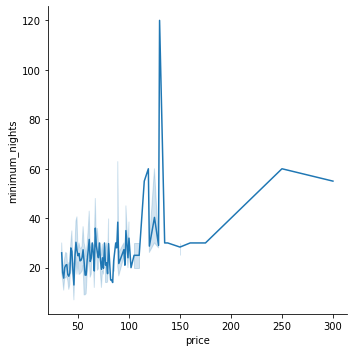

In [31]:
#price vs minimum nights for Private Rooms
sns.relplot('price', 'minimum_nights', data=airbnb_df[airbnb_df.room_type=='Private room'], kind='line')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


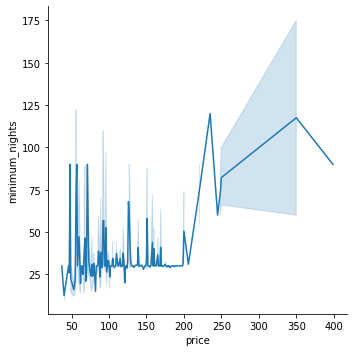

In [32]:
#price vs minimum nights for Entire home/apt Rooms
sns.relplot('price', 'minimum_nights', data=airbnb_df[airbnb_df.room_type=='Entire home/apt'], kind='line')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


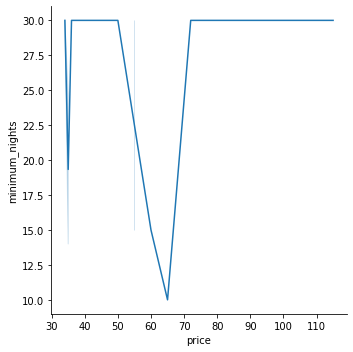

In [33]:
#price vs minimum nights for Shared Rooms
sns.relplot('price', 'minimum_nights', data=airbnb_df[airbnb_df.room_type=='Shared room'], kind='line')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


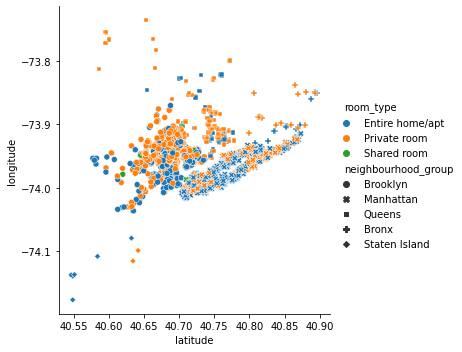

In [51]:
#distribution of Rooms (Airbnb)
sns.relplot('latitude', 'longitude', data=airbnb_df, hue='room_type', style='neighbourhood_group')

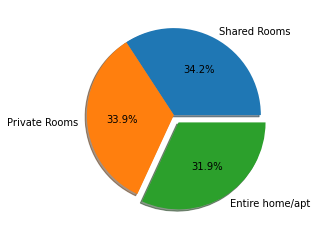

In [50]:
#reviews per Room type
num_of_shr_rooms = airbnb_df[airbnb_df.room_type=='Shared room'].room_type.count()
num_of_pvt_rooms = airbnb_df[airbnb_df.room_type=='Private room'].room_type.count()
num_of_ent_rooms = airbnb_df[airbnb_df.room_type=='Entire home/apt'].room_type.count()
array = [(airbnb_df[airbnb_df.room_type=='Shared room'].number_of_reviews.sum())/num_of_shr_rooms, (airbnb_df[airbnb_df.room_type=='Private room'].number_of_reviews.sum())/num_of_pvt_rooms, (airbnb_df[airbnb_df.room_type=='Entire home/apt'].number_of_reviews.sum())/num_of_ent_rooms]
arr_labels = ['Shared Rooms', 'Private Rooms', 'Entire home/apt']

plt.pie(array, labels = arr_labels, autopct='%0.1f%%', shadow=True, explode=[0,0,0.1])
plt.show()